In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

In [4]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

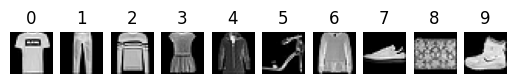

In [8]:
for digit in range(10):
# Find the first occurrence of each digit in the training dataset
  index = np.where(y_train == digit)[0][0]
# Display the image for this digit
  plt.subplot(1, 10, digit + 1)
  plt.imshow(x_train[index], cmap='gray')
  plt.title(f'{digit}')
  plt.axis('off') # Hide axis for a cleaner view
# Show the plot with all digits
plt.show()

In [9]:
# Normalize the pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the data (28x28 images to a flat 1D vector of 784 values)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes (fashion categories)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 32ms/step - accuracy: 0.7762 - loss: 0.6210
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - accuracy: 0.8834 - loss: 0.3222
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - accuracy: 0.9011 - loss: 0.2700
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.9146 - loss: 0.2309
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9260 - loss: 0.2007


In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9044 - loss: 0.2582
Test Accuracy: 0.9049000144004822


In [14]:
predictions = model.predict(x_test)
print(predictions[0])  # Display the prediction for the first test image

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
[3.7427476e-08 1.0623740e-09 1.3010451e-08 4.9537388e-09 2.6890661e-09
 7.0749870e-06 1.6482324e-09 3.8586365e-04 2.9373240e-08 9.9960703e-01]


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


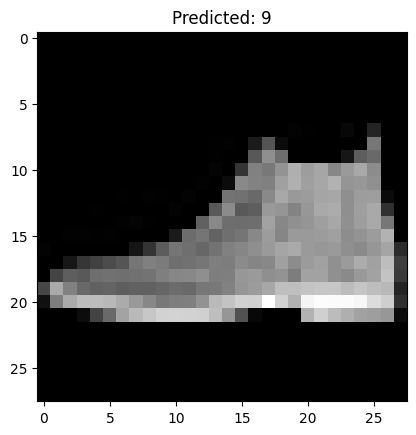

Predicted class (for the first image): 9


In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Make a prediction on the first test image
predictions = model.predict(x_test)

# Display the first image in the test set (index 0)
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')  # Reshape back to 28x28 image for display
plt.title(f"Predicted: {np.argmax(predictions[0])}")  # Display the predicted class as title
plt.show()

# Print the prediction for the first image
print(f"Predicted class (for the first image): {np.argmax(predictions[0])}")